# Activity 1.2 : Training Neural Networks


#### Objective(s):

This activity aims to demonstrate how to train neural networks using keras

#### Intended Learning Outcomes (ILOs):
* Demonstrate how to build and train neural networks
* Demonstrate how to evaluate and plot the model using training and validation loss


#### Resources:
* Jupyter Notebook

CI Pima Diabetes Dataset

* pima-indians-diabetes.csv


#### Procedures

Load the necessary libraries

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_auc_score, roc_curve, accuracy_score
from sklearn.ensemble import RandomForestClassifier

import seaborn as sns

%matplotlib inline

In [4]:
## Import Keras objects for Deep Learning

from keras.models  import Sequential
from keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization
from keras.optimizers import Adam, SGD, RMSprop

Load the dataset

In [5]:

filepath = "/content/drive/MyDrive/CPE313/pima-indians-diabetes.csv"
names = ["times_pregnant", "glucose_tolerance_test", "blood_pressure", "skin_thickness", "insulin",
         "bmi", "pedigree_function", "age", "has_diabetes"]
diabetes_df = pd.read_csv(filepath, names=names)

Check the top 5 samples of the data

In [6]:

print(diabetes_df.shape)
diabetes_df.sample(5)

(768, 9)


,times_pregnant,glucose_tolerance_test,blood_pressure,skin_thickness,insulin,bmi,pedigree_function,age,has_diabetes
271,2,108,62,32,56,25.2,0.128,21,0
440,0,189,104,25,0,34.3,0.435,41,1
360,5,189,64,33,325,31.2,0.583,29,1
686,3,130,64,0,0,23.1,0.314,22,0
291,0,107,62,30,74,36.6,0.757,25,1


In [7]:
diabetes_df['has_diabetes'].unique()

array([1, 0])

In [8]:
diabetes_df.dtypes

,0
times_pregnant,int64
glucose_tolerance_test,int64
blood_pressure,int64
skin_thickness,int64
insulin,int64
bmi,float64
pedigree_function,float64
age,int64
has_diabetes,int64


In [9]:
X = diabetes_df.iloc[:, :-1].values
y = diabetes_df["has_diabetes"].values

Split the data to Train, and Test (75%, 25%)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=11111)

In [11]:
np.mean(y), np.mean(1-y)

(np.float64(0.3489583333333333), np.float64(0.6510416666666666))

Build a single hidden layer neural network using 12 nodes.
Use the sequential model with single layer network and input shape to 8.



Normalize the data

In [12]:
normalizer = StandardScaler()
X_train_norm = normalizer.fit_transform(X_train)
X_test_norm = normalizer.transform(X_test)

Define the model:
* Input size is 8-dimensional
* 1 hidden layer, 12 hidden nodes, sigmoid activation
* Final layer with one node and sigmoid activation (standard for binary classification)

In [13]:


model  = Sequential([
    Dense(12, input_shape=(8,), activation="relu"),
    Dense(1, activation="sigmoid")
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


View the model summary

In [14]:

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 12)             │           108 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            13 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 121 (484.00 B)

 Trainable params: 121 (484.00 B)

 Non-trainable params: 0 (0.00 B)

Train the model
* Compile the model with optimizer, loss function and metrics
* Use the fit function to return the run history.


In [15]:
model.compile(optimizer= SGD(learning_rate=.003), loss="binary_crossentropy", metrics=["binary_accuracy"])
run_hist_1 = model.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), epochs=200)


Epoch 1/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - binary_accuracy: 0.3228 - loss: 0.8322 - val_binary_accuracy: 0.3073 - val_loss: 0.8231
Epoch 2/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - binary_accuracy: 0.3513 - loss: 0.8076 - val_binary_accuracy: 0.3229 - val_loss: 0.8116
Epoch 3/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - binary_accuracy: 0.3400 - loss: 0.7902 - val_binary_accuracy: 0.3333 - val_loss: 0.8008
Epoch 4/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - binary_accuracy: 0.3452 - loss: 0.8045 - val_binary_accuracy: 0.3490 - val_loss: 0.7906
Epoch 5/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - binary_accuracy: 0.3797 - loss: 0.7834 - val_binary_accuracy: 0.3646 - val_loss: 0.7810
Epoch 6/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - binary_accuracy: 0.4217 - loss: 0.7755 - val_binary_accuracy: 0.3698 - val_loss: 0.7719
Epoch 7/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - binary_accuracy: 0.4322 - loss: 0.7587 - val_binary_accuracy: 0.4062 - val_loss: 0.7634
Epoch 8/2

In [18]:
## Like we did for the Random Forest, we generate two kinds of predictions
#  One is a hard decision, the other is a probabilitistic score.

y_pred_prob_nn_1 = model.predict(X_test_norm)

y_pred_class_nn_1 = (y_pred_prob_nn_1 >= 0.5).astype(int)
print(y_pred_class_nn_1)
print(y_pred_prob_nn_1)
y_pred_prob_nn_1 = y_pred_prob_nn_1.ravel()
y_pred_class_nn_1 = y_pred_class_nn_1.ravel()


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
[[0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]]
[

In [19]:
# Let's check out the outputs to get a feel for how keras apis work.
y_pred_class_nn_1[:10]

array([0, 1, 0, 0, 0, 1, 0, 0, 1, 0])

In [20]:
y_pred_prob_nn_1[:10]

array([0.45753828, 0.57375574, 0.23680678, 0.41813415, 0.15840517,
       0.5252473 , 0.06608804, 0.44793764, 0.7903034 , 0.3489384 ],
      dtype=float32)

Create the plot_roc function

In [21]:
def plot_roc(y_test, y_pred, model_name):
    fpr, tpr, thr = roc_curve(y_test, y_pred)
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.plot(fpr, tpr, 'k-')
    ax.plot([0, 1], [0, 1], 'k--', linewidth=.5)  # roc curve for random model
    ax.grid(True)
    ax.set(title='ROC Curve for {} on PIMA diabetes problem'.format(model_name),
           xlim=[-0.01, 1.01], ylim=[-0.01, 1.01])



Evaluate the model performance and plot the ROC CURVE

accuracy is 0.766
roc-auc is 0.806


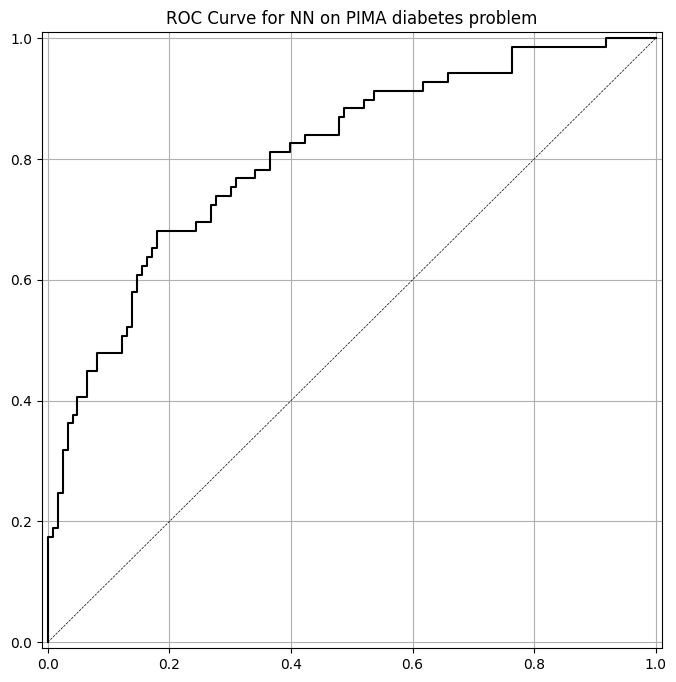

In [22]:

print('accuracy is {:.3f}'.format(accuracy_score(y_test,y_pred_class_nn_1)))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob_nn_1)))

plot_roc(y_test, y_pred_prob_nn_1, 'NN')

<b>Observation</b>
- Based on the result of the ROC curve graph is shows that model somehow demonstrates an effecting generalizing between diabetic and non-diabetic patients in the given dataset. Considering the fact that the model performance low I can say that it is better than random guessing. But we can improve it since we just use the raw data.

 Plot the training loss and the validation loss over the different epochs and see how it looks

In [23]:
run_hist_1.history.keys()

dict_keys(['binary_accuracy', 'loss', 'val_binary_accuracy', 'val_loss'])

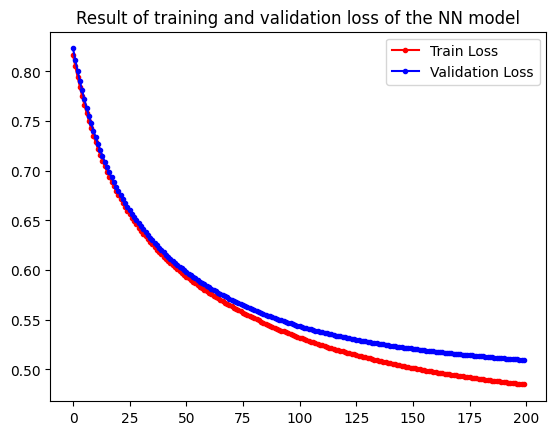

In [24]:
fig, ax = plt.subplots()
ax.plot(run_hist_1.history["loss"],'r', marker='.', label="Train Loss")
ax.plot(run_hist_1.history["val_loss"],'b', marker='.', label="Validation Loss")
ax.legend()
ax.set(title=f"Result of training and validation loss of the NN model")
plt.show()

What is your interpretation about the result of the train and validation loss?

<b>Observation</b>
- Based on the graph, it tells us that the ANN model is not an overfitting nor underfitting model. In fact the model is just right, however the performance of it in terms of generalizing the unseen data is low.

#type your answer here

#### Supplementary Activity

* Build a model with two hidden layers, each with 6 nodes
* Use the "relu" activation function for the hidden layers, and "sigmoid" for the final layer
* Use a learning rate of .003 and train for 1500 epochs
* Graph the trajectory of the loss functions, accuracy on both train and test set
* Plot the roc curve for the predictions
* Use different learning rates, numbers of epochs, and network structures.
* Plot the results of training and validation loss using different learning rates, number of epocgs and network structures
* Interpret your result

#type your answer here

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Since its my own ANN model I need to check the dataset that im going to use

# import the dataset
df = pd.read_csv("/content/drive/MyDrive/CPE313/pima-indians-diabetes.csv", names = ["times_pregnant", "glucose_tolerance_test", "blood_pressure", "skin_thickness", "insulin",
         "bmi", "pedigree_function", "age", "has_diabetes"])
df.head()

,times_pregnant,glucose_tolerance_test,blood_pressure,skin_thickness,insulin,bmi,pedigree_function,age,has_diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
# check for nulls and duplicates

df.isnull().sum()

,0
times_pregnant,0
glucose_tolerance_test,0
blood_pressure,0
skin_thickness,0
insulin,0
bmi,0
pedigree_function,0
age,0
has_diabetes,0


In [5]:
df.duplicated().sum()

np.int64(0)

In [6]:
df.mode().iloc[0]

,0
times_pregnant,1.000
glucose_tolerance_test,99.000
blood_pressure,70.000
skin_thickness,0.000
insulin,0.000
bmi,32.000
pedigree_function,0.254
age,22.000
has_diabetes,0.000


In [7]:
df.describe()

,times_pregnant,glucose_tolerance_test,blood_pressure,skin_thickness,insulin,bmi,pedigree_function,age,has_diabetes
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<b>Observation</b>
- Focus on looking on the result of the min, its not possible that glucose up to bmi are zero. It must be Nan values so we have to check it.

In [3]:
num1 = df[df["glucose_tolerance_test"] == 0]
num2 = df[df["blood_pressure"] == 0]
num3 = df[df["skin_thickness"] == 0]
num4 = df[df["insulin"] == 0]
num5 = df[df["bmi"] == 0]
num6 = df[df['pedigree_function'] == 0]

print(num1.shape)
print(num2.shape)
print(num3.shape)
print(num4.shape)
print(num5.shape)
print(num6.shape)


(5, 9)
(35, 9)
(227, 9)
(374, 9)
(11, 9)
(0, 9)


<b>Based on the results there are many null values. Lets check the our dataset count so we can determine if we will remove the dataset or modify its data.

In [9]:
df.shape

# Yeah there are few rows so we have to modify the dataset.

(768, 9)

In [4]:
# replace 0 with null values
df[["glucose_tolerance_test","blood_pressure","skin_thickness","insulin","bmi",'pedigree_function']] = df[["glucose_tolerance_test","blood_pressure","skin_thickness","insulin","bmi",'pedigree_function']].replace(0, np.nan)

In [11]:
df.isnull().sum()

,0
times_pregnant,0
glucose_tolerance_test,5
blood_pressure,35
skin_thickness,227
insulin,374
bmi,11
pedigree_function,0
age,0
has_diabetes,0


In [5]:
# replace null with mean values
df[["glucose_tolerance_test","blood_pressure","skin_thickness","insulin","bmi",'pedigree_function']] = df[["glucose_tolerance_test","blood_pressure","skin_thickness","insulin","bmi",'pedigree_function']].fillna(df[["glucose_tolerance_test","blood_pressure","skin_thickness","insulin","bmi",'pedigree_function']].mean())

In [13]:
# recheck if there are still nulls values
num1 = df[df["glucose_tolerance_test"] == 0]
num2 = df[df["blood_pressure"] == 0]
num3 = df[df["skin_thickness"] == 0]
num4 = df[df["insulin"] == 0]
num5 = df[df["bmi"] == 0]
num6 = df[df['pedigree_function'] == 0]

print(num1.shape)
print(num2.shape)
print(num3.shape)
print(num4.shape)
print(num5.shape)
print(num6.shape)


(0, 9)
(0, 9)
(0, 9)
(0, 9)
(0, 9)
(0, 9)


In [6]:
# Split the data into training and testing sets
X = df.drop(columns=['has_diabetes'])
y = df['has_diabetes']

<Axes: xlabel='has_diabetes', ylabel='count'>

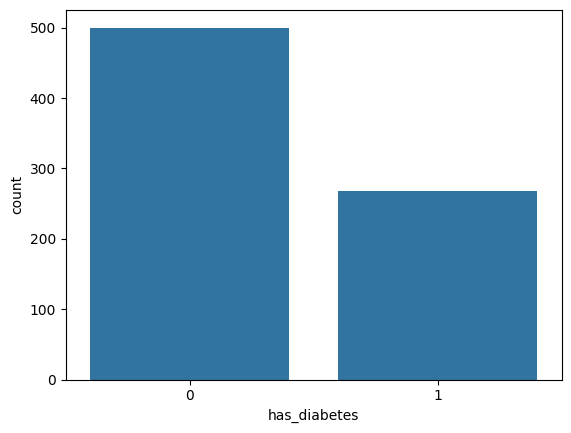

In [7]:
sns.countplot(data=df,x=y)

In [8]:
# Since the dataset is bias towward 0 class we need to valance it
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=41)
X_ros,y_ros = ros.fit_resample(X,y)

<Axes: xlabel='has_diabetes', ylabel='count'>

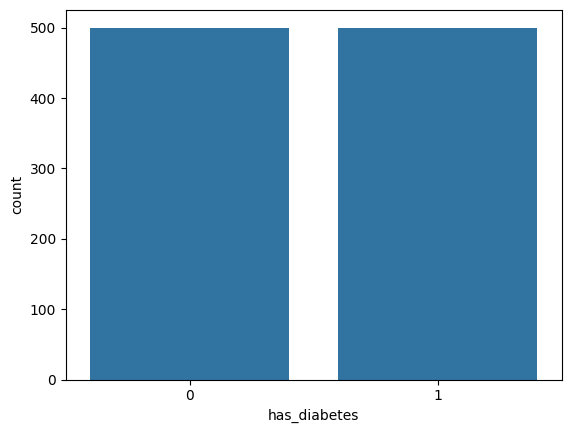

In [9]:
sns.countplot(data=df,x=y_ros)

<b>Split the dataset into train and test set

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [39]:
x_train, x_test, y_train, y_test = train_test_split(X_ros, y_ros, test_size= 0.25, random_state = 0)

SS = StandardScaler()

x_train = SS.fit_transform(x_train)
x_test = SS.fit_transform(x_test)

In [40]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(750, 8)
(250, 8)
(750,)
(250,)


<b>I think we will be good with this data.

1. Build a model with two hidden layers, each with 6 nodes
2. Use the "relu" activation function for the hidden layers, and "sigmoid" for the final layer

In [12]:
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.models import Model

In [55]:
input = Input((8,), name = 'Surfacelayer')

X = Dense(6, activation = 'relu', name = 'L1')(input)
X = Dense(6, activation = 'relu', name = 'L2')(X)

output = Dense(1, activation = "sigmoid", name = 'OutputLayer')(X)

model_sugar = Model(inputs = input, outputs = output, name = 'diabetesANN')
model_sugar.compile(optimizer= SGD(learning_rate = 0.003), loss = 'binary_crossentropy', metrics = ['binary_accuracy'])

In [49]:
model_sugar.summary()

Model: "indian diabetes ANN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Surface layer (InputLayer)      │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ L1 (Dense)                      │ (None, 6)              │            54 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ L2 (Dense)                      │ (None, 6)              │            42 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output Layer (Dense)            │ (None, 1)              │             7 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 103 (412.00 B)

 Trainable params: 103 (412.00 B)

 Non-trainable params: 0 (0.00 B)

In [16]:
# for  this time im going to create a callback so we can save the best model we have trained

from tensorflow.keras.callbacks import EarlyStopping

checkpoint = EarlyStopping(monitor = 'val_accuracy', patience = 100, mode = 'max', restore_best_weights = True)



In [56]:
my_model_hisst = model_sugar.fit(x_train,y_train, validation_data=(x_test,y_test), epochs=1500, callbacks = [checkpoint])

Epoch 1/1500
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - binary_accuracy: 0.3382 - loss: 0.7519 - val_binary_accuracy: 0.3646 - val_loss: 0.7487
Epoch 2/1500
17/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - binary_accuracy: 0.3914 - loss: 0.7418 

/usr/local/lib/python3.12/dist-packages/keras/src/callbacks/early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: binary_accuracy,loss,val_binary_accuracy,val_loss
  current = self.get_monitor_value(logs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - binary_accuracy: 0.3904 - loss: 0.7416 - val_binary_accuracy: 0.3854 - val_loss: 0.7388
Epoch 3/1500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - binary_accuracy: 0.3759 - loss: 0.7373 - val_binary_accuracy: 0.4010 - val_loss: 0.7298
Epoch 4/1500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - binary_accuracy: 0.4247 - loss: 0.7303 - val_binary_accuracy: 0.4062 - val_loss: 0.7218
Epoch 5/1500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - binary_accuracy: 0.4373 - loss: 0.7183 - val_binary_accuracy: 0.4271 - val_loss: 0.7144
Epoch 6/1500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - binary_accuracy: 0.4636 - loss: 0.7098 - val_binary_accuracy: 0.4531 - val_loss: 0.7077
Epoch 7/1500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - binary_accuracy: 0.5063 - loss: 0.6978 - val_binary_accuracy: 0.4948 - val_loss: 0.7015
Epoch 8/1500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - binary_accuracy: 0.5532 - loss: 0.6913 - val_binary_accuracy: 0.5312 - val_loss: 0.6957
Epoch 9/1500
18/18

3. Graph the trajectory of the loss functions, accuracy on both train and test set
4. Plot the roc curve for the predictions

In [57]:
# after training we need to use our model to predict x_test

y_pred_prob = model_sugar.predict(x_test)

y_pred =  (y_pred_prob >= 0.5).astype(int)
# convert multi dim array to single dim array
y_pred = y_pred.ravel()
y_pred_prob = y_pred_prob.ravel()

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step  


In [58]:
y_pred[:20]

array([1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1])

In [59]:
y_pred_prob[:20]

array([6.5541303e-01, 5.6068514e-02, 2.0613529e-02, 1.5275408e-01,
       7.0412540e-01, 5.5372864e-01, 3.4910487e-04, 6.1565304e-01,
       7.1656555e-01, 4.6174806e-01, 3.0635312e-01, 7.7513611e-01,
       5.1506084e-01, 1.4206146e-01, 4.5059347e-03, 7.4865907e-01,
       2.9995445e-02, 6.8171951e-03, 6.8601203e-01, 7.6661968e-01],
      dtype=float32)

In [60]:
from sklearn.metrics import classification_report, confusion_matrix

In [61]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.80      0.82       123
           1       0.68      0.72      0.70        69

    accuracy                           0.78       192
   macro avg       0.76      0.76      0.76       192
weighted avg       0.78      0.78      0.78       192



In [33]:
# Create the ROC cur graph function

def plot_roc(y_test, y_pred, model_name):
    fpr, tpr, thr = roc_curve(y_test, y_pred)
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.plot(fpr, tpr, 'k-')
    ax.plot([0, 1], [0, 1], 'k--', linewidth=.5)  # roc curve for random model
    ax.grid(True)
    ax.set(title='ROC Curve for {} on PIMA diabetes problem'.format(model_name),
           xlim=[-0.01, 1.01], ylim=[-0.01, 1.01])


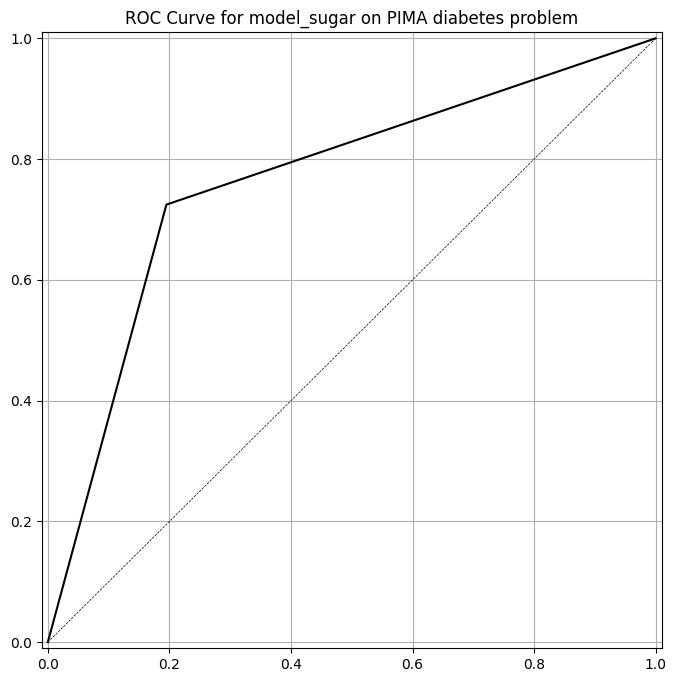

In [63]:
#plot the ROC CURVE
plot_roc(y_test,y_pred, 'model_sugar')

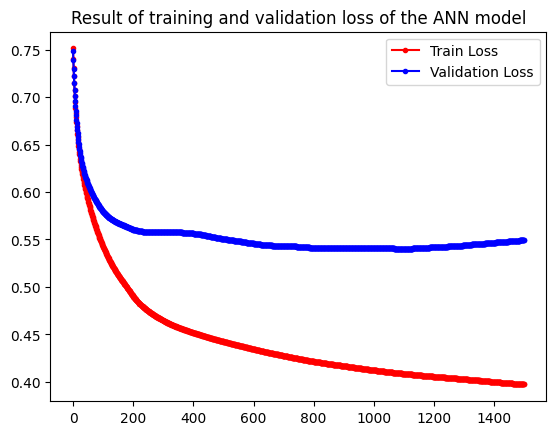

In [65]:
fig, ax = plt.subplots()
ax.plot(my_model_hisst.history["loss"],'r', marker='.', label="Train Loss")
ax.plot(my_model_hisst.history["val_loss"],'b', marker='.', label="Validation Loss")
ax.legend()
ax.set(title=f"Result of training and validation loss of the ANN model")
plt.show()

<b>Observation</b>
- Even if we have a higher accuracy compare to the recent model. If we are going to look at the loss function of the current model we can say that we have an overfitting model.


5. Use different learning rates, numbers of epochs, and network structures.
6. Plot the results of training and validation loss using different learning rates, number of epocgs and network structures

In [13]:
input = Input((8,), name= 'I1')

X = Dense(64, activation = 'relu', name = 'D1')(input)
X = Dropout(0.1)(X)
X = Dense(32, activation = 'relu', name = 'D2')(X)
X = Dense(16, activation = 'relu', name = 'D3')(X)
X = Dense(16, activation = 'relu', name = 'D4')(X)

output = Dense(1, activation = 'sigmoid', name = 'O1')(X)

model_sugar_ANN = Model(inputs= input, outputs = output, name= 'sugar')

# instead of using the sgd as optimizer
# I will just use the Adam(learning_rate = 0.001) which is default in "adam"
model_sugar_ANN.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])


In [14]:
model_sugar_ANN.summary()

Model: "sugar"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ I1 (InputLayer)                 │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ D1 (Dense)                      │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ D2 (Dense)                      │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ D3 (Dense)                      │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ D4 (Dense)                      │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ O1 (Dense)                      │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,473 (13.57 KB)

 Trainable params: 3,473 (13.57 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
sugar_hist_new = model_sugar_ANN.fit(x_train, y_train, epochs=150, steps_per_epoch = 200, validation_data = (x_test,y_test), callbacks = [checkpoint])

Epoch 1/150
169/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6438 - loss: 0.6402

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6540 - loss: 0.6296 - val_accuracy: 0.8000 - val_loss: 0.4271
Epoch 2/150
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7431 - loss: 0.5168 - val_accuracy: 0.8200 - val_loss: 0.4161
Epoch 3/150
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7520 - loss: 0.4858 - val_accuracy: 0.8300 - val_loss: 0.3756
Epoch 4/150
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7701 - loss: 0.4742 - val_accuracy: 0.8500 - val_loss: 0.3858
Epoch 5/150
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7979 - loss: 0.4320 - val_accuracy: 0.8500 - val_loss: 0.3694
Epoch 6/150
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7609 - loss: 0.4591 - val_accuracy: 0.8600 - val_loss: 0.3392
Epoch 7/150
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7966 - loss: 0.4334 - val_accuracy: 0.8600 - val_loss: 0.3430
Epoch 8/150
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7991 - loss: 0.4169 - val_accuracy: 0.8400

In [20]:
y_pred_prob_new = model_sugar_ANN.predict(x_test)
y_pred_new = (y_pred_prob_new >= 0.5).astype(int)
y_pred_prob_new = y_pred_prob_new.ravel()
y_pred_new = y_pred_new.ravel()

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


In [22]:
y_pred_prob_new[:10]

array([9.8937112e-01, 8.5123020e-01, 9.1070086e-01, 4.3828944e-03,
       1.4747221e-05, 9.4222265e-01, 5.5101311e-05, 9.5012766e-01,
       5.7224286e-01, 6.2131673e-01], dtype=float32)

In [23]:
y_test[:10]

,has_diabetes
993,1
859,1
298,1
553,0
672,0
971,1
27,0
231,1
306,1
706,1


In [24]:
y_pred_new[:10]

array([1, 1, 1, 0, 0, 1, 0, 1, 1, 1])

In [25]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test,y_pred_new))

              precision    recall  f1-score   support

           0       1.00      0.93      0.96        54
           1       0.92      1.00      0.96        46

    accuracy                           0.96       100
   macro avg       0.96      0.96      0.96       100
weighted avg       0.96      0.96      0.96       100



<Axes: >

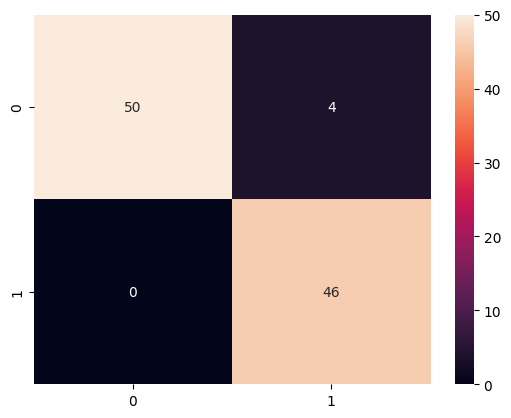

In [29]:
# graph the confusion matrix
latest_mat = confusion_matrix(y_test,y_pred_new)

sns.heatmap(latest_mat, fmt= '.2g', annot = True)

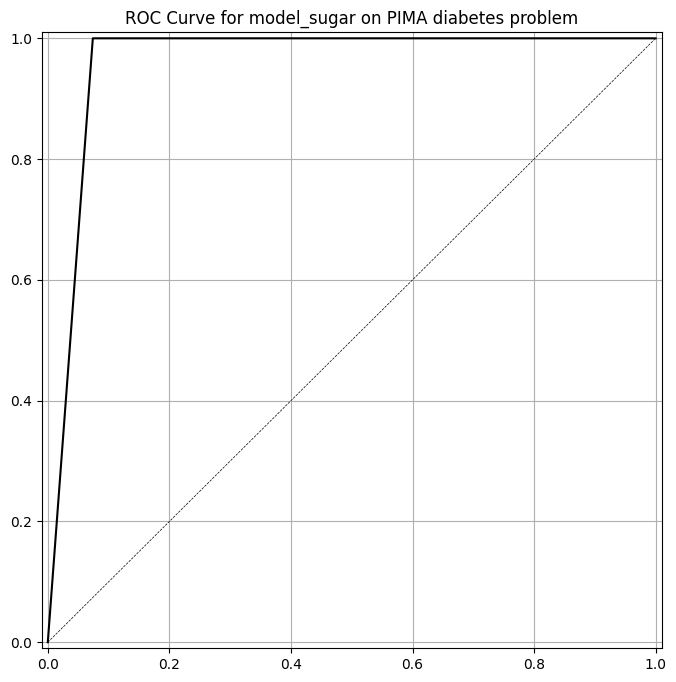

In [35]:
#plot the ROC CURVE
plot_roc(y_test,y_pred_new, 'model_sugar')

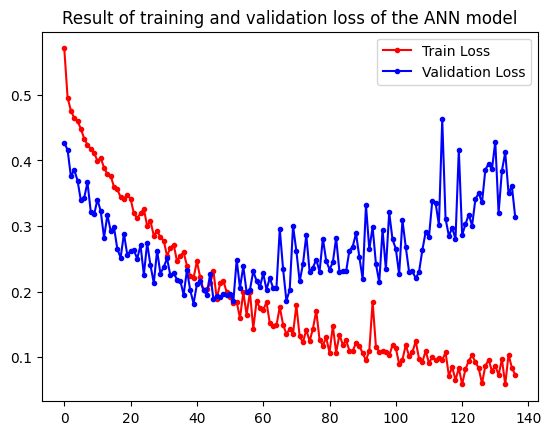

In [37]:
fig, ax = plt.subplots()
ax.plot(sugar_hist_new.history["loss"],'r', marker='.', label="Train Loss")
ax.plot(sugar_hist_new.history["val_loss"],'b', marker='.', label="Validation Loss")
ax.legend()
ax.set(title=f"Result of training and validation loss of the ANN model")
plt.show()

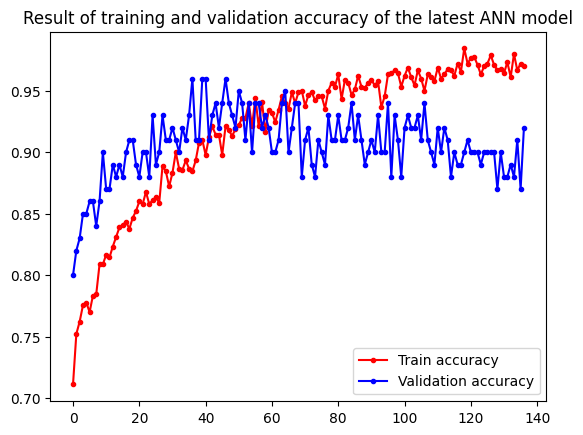

In [38]:
fig, ax = plt.subplots()
ax.plot(sugar_hist_new.history["accuracy"],'r', marker='.', label="Train accuracy")
ax.plot(sugar_hist_new.history["val_accuracy"],'b', marker='.', label="Validation accuracy")
ax.legend()
ax.set(title=f"Result of training and validation accuracy of the latest ANN model")
plt.show()

<b>Observation</b>
- After completing the training process of our model, by graphing the result of its performance. The latest model shows an excellent performance basically by looking at the classification report the model shows accuracy of 96%. When it comes to understanding the the graph of loss function and accuracy. We can see here that at the first few epoch, the model is just perfroming right. However, after the 60 epochs onward the training process eventually enters an overfitting phase. Fortunately, by using earlyStopping it helps to select the model at the epoch with the lowest validation loss, ensuring the final model remains well-generalized. It is eviden in our latest model that it shows an excellent performance.

# <font size = 6>Conclusion</font>

- After completing the activity, I was able to learn how to Train Neural networks using the tensorflow API. I also able to learn how to tune our model in order to obtain the result that we want. Upon tuning the model, I realize that even if we add several hidden or tune for a long time our model remains underfitting or overfitting as long as the data that we are using is not clean or has bias in other classes. Wherein, most of my time that I spent in this activity is more on data cleaning instead of model tuning. Overall, this activity is really interesting for me since I learn a lot of things that I need to consider in the future activities.